In [153]:
from tempfile import TemporaryDirectory
import matplotlib.pyplot as plt
from matplotlib import cm
import suite2p
import numpy as np
import pandas as pd
from pathlib import Path


In [99]:
jet = cm.get_cmap('jet')
jet.set_bad(color='k')

# Running suite2p on example data

## Set pipeline parameters


In [2]:
ops = suite2p.default_ops()
print(ops)

{'look_one_level_down': False, 'fast_disk': [], 'delete_bin': False, 'mesoscan': False, 'bruker': False, 'h5py': [], 'h5py_key': 'data', 'save_path0': [], 'save_folder': [], 'subfolders': [], 'move_bin': False, 'nplanes': 1, 'nchannels': 1, 'functional_chan': 1, 'tau': 1.0, 'fs': 10.0, 'force_sktiff': False, 'frames_include': -1, 'multiplane_parallel': False, 'preclassify': 0.0, 'save_mat': False, 'save_NWB': False, 'combined': True, 'aspect': 1.0, 'do_bidiphase': False, 'bidiphase': 0, 'bidi_corrected': False, 'do_registration': 1, 'two_step_registration': False, 'keep_movie_raw': False, 'nimg_init': 300, 'batch_size': 500, 'maxregshift': 0.1, 'align_by_chan': 1, 'reg_tif': False, 'reg_tif_chan2': False, 'subpixel': 10, 'smooth_sigma_time': 0, 'smooth_sigma': 1.15, 'th_badframes': 1.0, 'pad_fft': False, 'nonrigid': True, 'block_size': [128, 128], 'snr_thresh': 1.2, 'maxregshiftNR': 5, '1Preg': False, 'spatial_hp': 25, 'spatial_hp_reg': 26, 'spatial_hp_detect': 25, 'pre_smooth': 2, 'sp

## Set Data Path
`Ops` and `db` are functionally equivalent internally in suite2p. 

**Important**: Parmeters provided in `db` will overwrite parameters specified in `ops`. Since it's common to change datasets and keep the same parameters for each dataset, it can be useful to specify data-related arguments in `db` and pipeline parameters in `ops`. 

In [3]:
db = {
    'data_path': ['../data/test_data'],
    'save_path0': TemporaryDirectory().name,
    'tiff_list': ['input_1500.tif'],
}
db

{'data_path': ['../data/test_data'],
 'save_path0': 'D:\\Temp\\tmpmvp8nq3_',
 'tiff_list': ['input_1500.tif']}

## Run Suite2p on Data

The `suite2p.run_s2p` function runs the pipeline and returns a list of output dictionaries containing the pipeline parameters used and extra data calculated along the way, one for each plane.

In [4]:
output_ops = suite2p.run_s2p(ops=ops, db=db)

{'data_path': ['../data/test_data'], 'save_path0': 'D:\\Temp\\tmpmvp8nq3_', 'tiff_list': ['input_1500.tif']}
tif
** Found 1 tifs - converting to binary **
time 1.86 sec. Wrote 1500 tiff frames to binaries for 1 planes
>>>>>>>>>>>>>>>>>>>>> PLANE 0 <<<<<<<<<<<<<<<<<<<<<<
NOTE: not registered / registration forced with ops['do_registration']>1
      (no previous offsets to delete)
----------- REGISTRATION
registering 1500 frames
Reference frame, 8.53 sec.
----------- Total 27.37 sec
Registration metrics, 7.54 sec.
----------- ROI DETECTION
Binning movie in chunks of length 10
Binned movie [150,252,254], 0.73 sec.
NOTE: estimated spatial scale ~12 pixels, time epochs 1.00, threshold 10.00 
0 ROIs, score=85.03
Found 300 ROIs, 3.79 sec
After removing overlaps, 296 ROIs remain
Masks made in 4.84 sec.
----------- Total 9.53 sec.
----------- EXTRACTION
Extracted fluorescence from 296 ROIs in 1500 frames, 1.60 sec.
added enhanced mean image
----------- Total 3.73 sec.
----------- CLASSIFICATION

In [5]:
output_op = output_ops[0]
print(output_op.keys())

dict_keys(['look_one_level_down', 'fast_disk', 'delete_bin', 'mesoscan', 'bruker', 'h5py', 'h5py_key', 'save_path0', 'save_folder', 'subfolders', 'move_bin', 'nplanes', 'nchannels', 'functional_chan', 'tau', 'fs', 'force_sktiff', 'frames_include', 'multiplane_parallel', 'preclassify', 'save_mat', 'save_NWB', 'combined', 'aspect', 'do_bidiphase', 'bidiphase', 'bidi_corrected', 'do_registration', 'two_step_registration', 'keep_movie_raw', 'nimg_init', 'batch_size', 'maxregshift', 'align_by_chan', 'reg_tif', 'reg_tif_chan2', 'subpixel', 'smooth_sigma_time', 'smooth_sigma', 'th_badframes', 'pad_fft', 'nonrigid', 'block_size', 'snr_thresh', 'maxregshiftNR', '1Preg', 'spatial_hp', 'spatial_hp_reg', 'spatial_hp_detect', 'pre_smooth', 'spatial_taper', 'roidetect', 'spikedetect', 'sparse_mode', 'diameter', 'spatial_scale', 'connected', 'nbinned', 'max_iterations', 'threshold_scaling', 'max_overlap', 'high_pass', 'inner_neuropil_radius', 'min_neuropil_pixels', 'allow_overlap', 'chan2_thres', 'ba

## Visualizations

### Registration

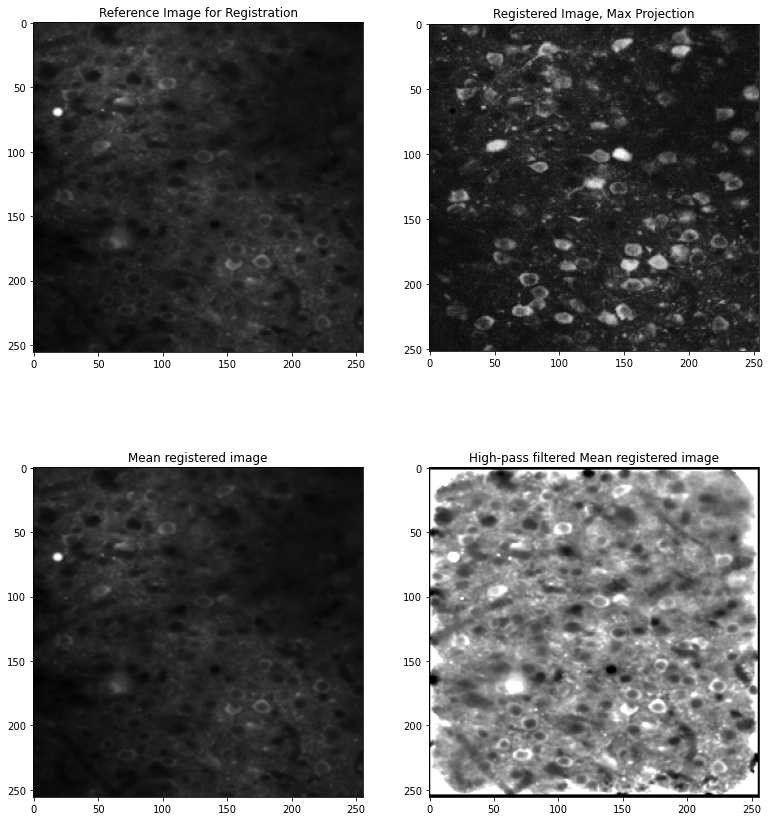

In [6]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(ncols=2, nrows=2, figsize=(13, 15));
ax1.imshow(output_op['refImg'], cmap='gray')
ax1.set(
    title="Reference Image for Registration",
);
ax2.imshow(output_op['max_proj'], cmap='gray')
ax2.set(
    title="Registered Image, Max Projection",
);
ax3.imshow(output_op['meanImg'], cmap='gray')
ax3.set(
    title="Mean registered image",
);
ax4.imshow(output_op['meanImgE'], cmap='gray')
ax4.set(
    title="High-pass filtered Mean registered image",
);


### Detection


In [7]:
print(output_op.keys())

dict_keys(['look_one_level_down', 'fast_disk', 'delete_bin', 'mesoscan', 'bruker', 'h5py', 'h5py_key', 'save_path0', 'save_folder', 'subfolders', 'move_bin', 'nplanes', 'nchannels', 'functional_chan', 'tau', 'fs', 'force_sktiff', 'frames_include', 'multiplane_parallel', 'preclassify', 'save_mat', 'save_NWB', 'combined', 'aspect', 'do_bidiphase', 'bidiphase', 'bidi_corrected', 'do_registration', 'two_step_registration', 'keep_movie_raw', 'nimg_init', 'batch_size', 'maxregshift', 'align_by_chan', 'reg_tif', 'reg_tif_chan2', 'subpixel', 'smooth_sigma_time', 'smooth_sigma', 'th_badframes', 'pad_fft', 'nonrigid', 'block_size', 'snr_thresh', 'maxregshiftNR', '1Preg', 'spatial_hp', 'spatial_hp_reg', 'spatial_hp_detect', 'pre_smooth', 'spatial_taper', 'roidetect', 'spikedetect', 'sparse_mode', 'diameter', 'spatial_scale', 'connected', 'nbinned', 'max_iterations', 'threshold_scaling', 'max_overlap', 'high_pass', 'inner_neuropil_radius', 'min_neuropil_pixels', 'allow_overlap', 'chan2_thres', 'ba

In [18]:
list(Path(output_op['save_path']).iterdir())

[WindowsPath('D:/Temp/tmpmvp8nq3_/suite2p/plane0/data.bin'),
 WindowsPath('D:/Temp/tmpmvp8nq3_/suite2p/plane0/F.npy'),
 WindowsPath('D:/Temp/tmpmvp8nq3_/suite2p/plane0/Fneu.npy'),
 WindowsPath('D:/Temp/tmpmvp8nq3_/suite2p/plane0/iscell.npy'),
 WindowsPath('D:/Temp/tmpmvp8nq3_/suite2p/plane0/ops.npy'),
 WindowsPath('D:/Temp/tmpmvp8nq3_/suite2p/plane0/spks.npy'),
 WindowsPath('D:/Temp/tmpmvp8nq3_/suite2p/plane0/stat.npy')]

In [50]:
stats_file = Path(output_op['save_path']).joinpath('stat.npy')
stats = np.load(stats_file, allow_pickle=True)
stats.shape 

(296,)

In [51]:
stats[0].keys()

dict_keys(['ypix', 'xpix', 'lam', 'footprint', 'mrs', 'mrs0', 'compact', 'med', 'npix', 'overlap', 'radius', 'aspect_ratio', 'npix_norm', 'skew', 'std'])

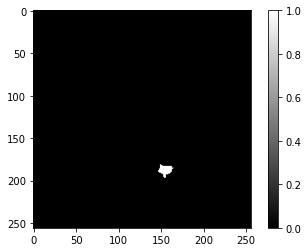

In [140]:
def make_image_from_roi_dict(roi, Ly: int, Lx: int):
    im = np.zeros((Ly, Lx))
    im[roi['ypix'], roi['xpix']] = 1
    return im
    
im = make_image_from_roi_dict(stats[0], Ly=output_op['Ly'], Lx=output_op['Lx'])
plt.imshow(im, cmap='gray');
plt.colorbar();

In [141]:
iscell = np.load(Path(output_op['save_path']).joinpath('iscell.npy'), allow_pickle=True)
iscell.shape
ic = iscell[:, 0].astype(bool)
f"{ic.mean():.2%} of the {len(ic)} ROIs are classified as cells."

'42.91% of the 296 ROIs are classified as cells.'

D:\miniconda3\envs\suite2p\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: All-NaN slice encountered
  
D:\miniconda3\envs\suite2p\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: All-NaN slice encountered
  # This is added back by InteractiveShellApp.init_path()
D:\miniconda3\envs\suite2p\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: All-NaN slice encountered
  


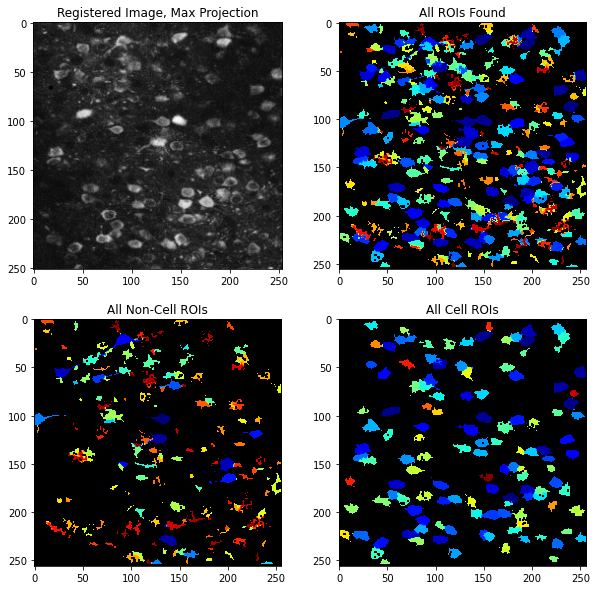

In [145]:
im = np.array([make_image_from_roi_dict(stat, Ly=output_op['Ly'], Lx=output_op['Lx']) * i for i, stat in enumerate(stats)])
im[im == 0] = np.nan

fig, ((ax1, ax2), (ax3, ax4))= plt.subplots(ncols=2, nrows=2, figsize=(10,10))
ax1.imshow(output_op['max_proj'], cmap='gray')
ax1.set(title="Registered Image, Max Projection")

ax2.imshow(np.nanmax(im, axis=0), cmap='jet')
ax2.set(title="All ROIs Found")

ax3.imshow(np.nanmax(im[~ic], axis=0), cmap='jet')
ax3.set(title="All Non-Cell ROIs")

ax4.imshow(np.nanmax(im[ic], axis=0), cmap='jet')
ax4.set(title="All Cell ROIs");


## Extract Traces


In [195]:
F = np.load(Path(output_op['save_path']).joinpath('F.npy'))
F.shape

(296, 1500)

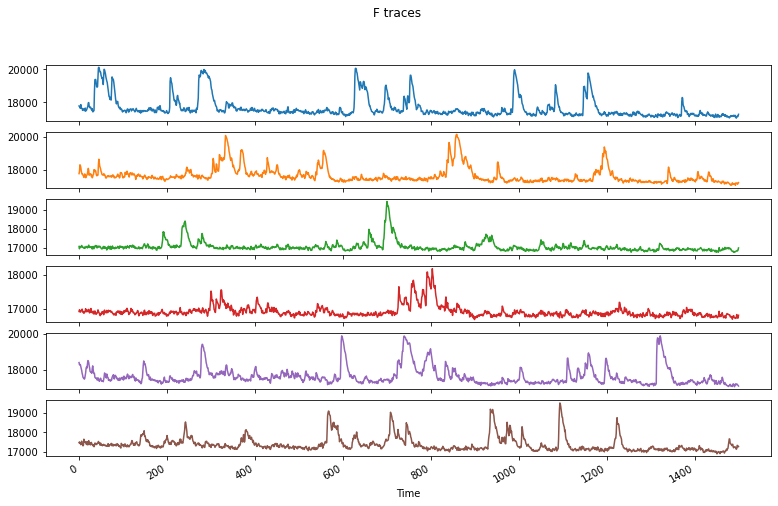

In [197]:
dF = pd.DataFrame(F)
dF.rename_axis(index='ROI ID', columns='Time', inplace=True)
dF[0:6].T.plot(subplots=True, legend=False, figsize=(13,8), title="F traces");

In [194]:
Fneu = np.load(Path(output_op['save_path']).joinpath('Fneu.npy'))
Fneu.shape

(296, 1500)

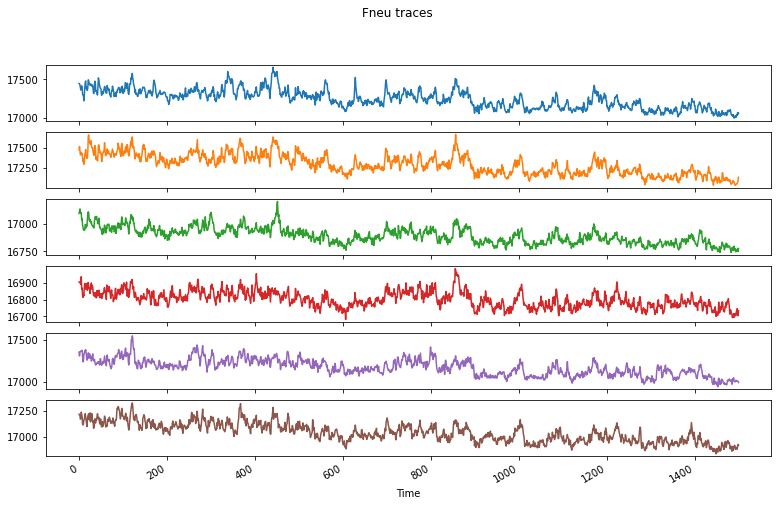

In [210]:
dFneu = pd.DataFrame(Fneu)
dFneu.rename_axis(index='ROI ID', columns='Time', inplace=True)
dFneu[0:6].T.plot(subplots=True, legend=False, figsize=(13,8), title="Fneu traces");

In [204]:
dF.head()

Time,0,1,2,3,4,5,6,7,8,9,...,1490,1491,1492,1493,1494,1495,1496,1497,1498,1499
ROI ID,,,,,,,,,,,,,,,,,,,,,
0,17785.283203,17746.697266,17674.078125,17649.591797,17866.929688,17653.218750,17652.154297,17634.458984,17517.687500,17569.296875,...,17151.156250,17221.615234,17151.757812,17086.621094,17048.687500,17148.046875,17165.410156,17132.837891,17170.207031,17279.193359
1,17804.449219,17941.921875,18336.615234,18288.599609,18178.935547,17968.953125,17841.488281,17772.587891,17786.310547,17703.816406,...,17189.412109,17215.273438,17107.138672,17247.287109,17238.591797,17217.146484,17228.822266,17167.480469,17244.433594,17267.431641
2,17075.773438,16951.767578,17070.062500,17057.052734,17066.822266,17059.201172,17125.144531,17033.833984,17040.697266,17018.349609,...,16779.861328,16799.187500,16793.087891,16813.037109,16837.662109,16842.113281,16860.523438,16839.855469,16887.880859,16995.068359
3,16936.523438,16988.537109,16953.681641,16917.767578,16930.433594,16959.177734,16989.164062,17005.779297,16954.699219,16911.806641,...,16754.865234,16742.117188,16754.208984,16734.353516,16772.611328,16848.132812,16781.320312,16743.066406,16746.095703,16826.609375
4,18391.291016,18267.109375,18288.285156,18271.470703,18173.859375,18058.242188,17947.683594,17792.978516,17701.546875,17572.404297,...,17047.550781,17159.582031,17204.394531,17149.332031,17161.875000,17202.677734,17179.972656,17138.720703,17125.992188,17084.236328


In [209]:
dd = dF.reset_index()
dFl = pd.melt(dd, value_name='Flourescence', value_vars=dd.columns[1:], id_vars=['ROI ID'])
dFl.head()

,ROI ID,Time,Flourescence
0,0,0,17785.283203
1,1,0,17804.449219
2,2,0,17075.773438
3,3,0,16936.523438
4,4,0,18391.291016


In [216]:
dFneu_id = dFneu.reset_index()
dFneu_long = pd.melt(dFneu_id, value_name='Neu Flourescence', value_vars=dd.columns[1:], id_vars=['ROI ID'])
dFneu_long.head()

,ROI ID,Time,Neu Flourescence
0,0,0,17446.750000
1,1,0,17483.363281
2,2,0,17093.082031
3,3,0,16903.986328
4,4,0,17352.003906


In [223]:
merged_dF = pd.merge(left=dFl, right=dFneu_long, on=['ROI ID', 'Time'])
merged_dF.head()

,ROI ID,Time,Flourescence,Neu Flourescence
0,0,0,17785.283203,17446.750000
1,1,0,17804.449219,17483.363281
2,2,0,17075.773438,17093.082031
3,3,0,16936.523438,16903.986328
4,4,0,18391.291016,17352.003906


In [224]:
aa =pd.melt(merged_dF, id_vars=['ROI ID', 'Time'], value_name='F', var_name='ROI Type')
aa.head()

,ROI ID,Time,ROI Type,F
0,0,0,Flourescence,17785.283203
1,1,0,Flourescence,17804.449219
2,2,0,Flourescence,17075.773438
3,3,0,Flourescence,16936.523438
4,4,0,Flourescence,18391.291016


In [227]:
import seaborn as sns

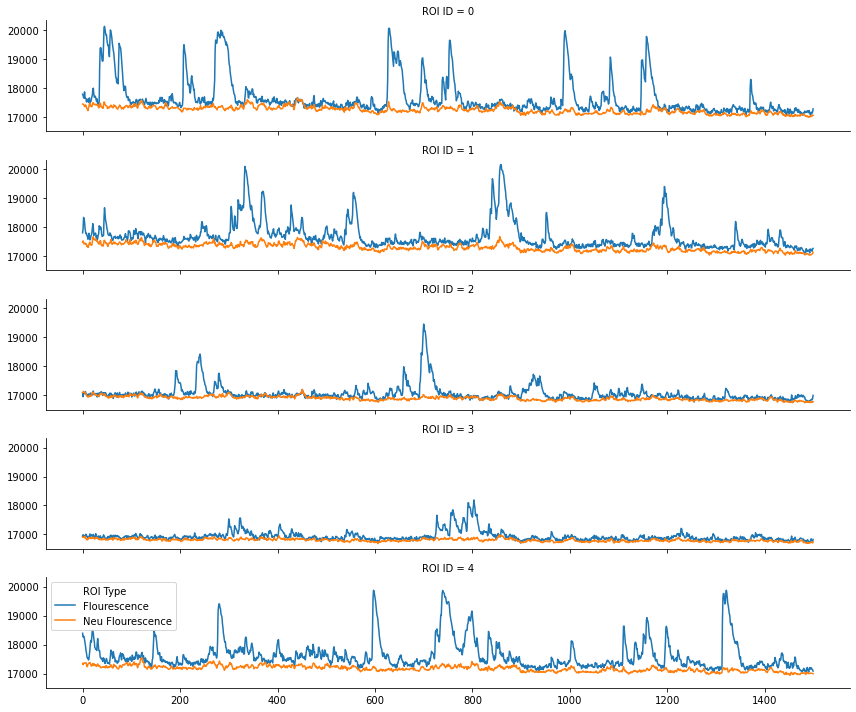

In [244]:
g = sns.FacetGrid(data=aa[aa['ROI ID'] < 5], row='ROI ID', height=2, aspect=6)
g.map_dataframe(sns.lineplot, x='Time', y='F', hue='ROI Type');
plt.legend()